# Tensorflow Demo Code
* Tensorflow is another machine-learning based python library that helps us create neural networks
* Neural networks are an AI method ethat teaches computers to process data similar to a human brain


### Imports
* Don't forget to run pip install tensorflow in your terminal first

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

### Getting Our Data

In [2]:
df = pd.read_csv("Michigan_GameLogs_W24.csv")
df.head()

,id,date,year,opponent,home_away,result,points_scored,points_against,pass_cmp,pass_att,...,pass_yrds,pass_td,pass_1st_down,rush_att,rush_yrds,rush_td,rush_1st_down,total_offense,fumbles,ints
0,1,2011-09-03,2011,Western Michigan,Home,W,34,10,9,13,...,98,0,5,26,190,3,9,288,0,0
1,2,2011-09-10,2011,Notre Dame,Home,W,35,31,11,24,...,338,4,10,26,114,1,5,452,0,3
2,3,2011-09-17,2011,Eastern Michigan,Home,W,31,3,7,18,...,95,2,5,50,376,2,19,471,0,1
3,4,2011-09-24,2011,San Diego State,Home,W,28,7,8,17,...,93,0,3,45,320,4,14,413,2,2
4,5,2011-10-01,2011,Minnesota,Home,W,58,0,18,25,...,217,3,10,48,363,3,19,580,0,0


In [3]:
df.columns

Index(['id', 'date', 'year', 'opponent', 'home_away', 'result',
       'points_scored', 'points_against', 'pass_cmp', 'pass_att', 'pass_pct',
       'pass_yrds', 'pass_td', 'pass_1st_down', 'rush_att', 'rush_yrds',
       'rush_td', 'rush_1st_down', 'total_offense', 'fumbles', 'ints'],
      dtype='object')

In [4]:
df_parsed = df[["points_scored", "points_against", "pass_cmp", "pass_att", "pass_pct", "pass_yrds", "pass_td", "pass_1st_down",
                "rush_att", "rush_yrds", "rush_td", "rush_1st_down", "total_offense", "fumbles", "ints"]]
df_parsed

,points_scored,points_against,pass_cmp,pass_att,pass_pct,pass_yrds,pass_td,pass_1st_down,rush_att,rush_yrds,rush_td,rush_1st_down,total_offense,fumbles,ints
0,34,10,9,13,69.2,98,0,5,26,190,3,9,288,0,0
1,35,31,11,24,45.8,338,4,10,26,114,1,5,452,0,3
2,31,3,7,18,38.9,95,2,5,50,376,2,19,471,0,1
3,28,7,8,17,47.1,93,0,3,45,320,4,14,413,2,2
4,58,0,18,25,72.0,217,3,10,48,363,3,19,580,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,31,24,12,23,52.2,141,0,9,45,150,3,9,291,0,1
161,30,24,17,21,81.0,182,1,10,39,156,2,8,338,0,0
162,26,0,22,30,73.3,147,0,9,34,66,2,3,213,0,0
163,27,20,17,27,63.0,221,3,10,32,130,1,5,351,1,0


### Splitting our Data into Training and Testing

In [5]:
#selecting 75% of data for training data
train_df = df_parsed.sample(frac = 0.75, random_state = 4)

#drops training data from the original dataframe, the other 25% is validation/test data
test_df = df_parsed.drop(train_df.index)

In [ ]:
#scaling our data bc NNs perform better on data in same range
# calling to the (0,1) range
max_val = train_df.max(axis = 0)
min_val = train_df.min(axis = 0)

our_range = max_val - min_val
train_df = (train_df - min_val) / our_range
test_df = (test_df - min_val) / our_range

### Seperate our Data into Targets and Labels

In [6]:
# Our model is looking for targets and labels so we need to separate our data into such categories
# In this case, we want points scored to be the target (output) and rest of columns are labels (inputs for model)
y_train = train_df['points_scored'] #target
y_test = test_df['points_scored']

X_train = train_df.drop('points_scored', axis = 1) #labels
X_test = test_df.drop('points_scored', axis = 1)

#format the features/inputs as an arugment for model by shaping it accordingly
input_shape = [X_train.shape[1]]
input_shape
#[14] denotes that we are passing 14 features as an input to our first layer of NN

[14]

### Building our Model using Keras and Adam Optimizer
* To build our model, we are going to use the built-in Keras library model within Tensorflow and specifically its 'Sequential' method. This method is very good for multilayered Nueral Networks, which is what we are doing.
* We will create a 3 layer network (1 input layer, 1 hidden layer, and 1 output layer)
* The input and hidden layers will have 64 units/node
* Our layers will Dense layers (there are different types, feel free to research more)
* Activation functions are used to introduce non-linearity to NNs. We will use one called reLu (Rectified Linear Unit) which changes the output of the node in non-negative values

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 64, activation = 'relu', input_shape = input_shape),
    tf.keras.layers.Dense(units = 64, activation = 'relu'),
    tf.keras.layers.Dense(units = 1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
_________________________________________________________________


In [17]:
# we will use Adam optimizer, and the MAE (mean absolute error) for loss
# Adam optimizer is an algorithm that uses stochastic gradient descent
# loss is measure of how bad the model's prediction was

model.compile(optimizer = 'adam', loss = 'mae')

### Training our Model in Batches
* Our model is trained by feeding it batches through an epoch (an iteration in NN). This is helpful for digesting large amounts of data
* This specific data set is small but others are significantly larger.
* Batch size refers to breaking our total training data into smaller groups and feeding it into the model

In [18]:
losses = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 256, epochs = 15)

Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 7.7657 - val_loss: 17.2097
Epoch 2/15
1/1 [==============================] - 0s 68ms/step - loss: 18.0801 - val_loss: 9.4632
Epoch 3/15
1/1 [==============================] - 0s 77ms/step - loss: 8.9000 - val_loss: 9.6564
Epoch 4/15
1/1 [==============================] - 0s 78ms/step - loss: 10.2817 - val_loss: 13.5351
Epoch 5/15
1/1 [==============================] - 0s 80ms/step - loss: 14.0407 - val_loss: 11.5060
Epoch 6/15
1/1 [==============================] - 0s 76ms/step - loss: 12.0301 - val_loss: 7.8219
Epoch 7/15
1/1 [==============================] - 0s 75ms/step - loss: 8.5956 - val_loss: 8.2992
Epoch 8/15
1/1 [==============================] - 0s 76ms/step - loss: 7.7702 - val_loss: 10.3376
Epoch 9/15
1/1 [==============================] - 0s 73ms/step - loss: 10.0640 - val_loss: 10.9409
Epoch 10/15
1/1 [==============================] - 0s 83ms/step - loss: 10.8846 - val_loss: 9.8839
Epoch 11/15
1/1 [===

### Compare Predictions to Actual Results


In [19]:
# let's say we want to pass the first 3 rows of features of our data to make predictions
# [0:3] indicates first 3 rows, : indicates all of the columns
model.predict(X_test.iloc[0:3, :])

1/1 [==============================] - 0s 134ms/step


array([[27.941933],
       [42.484306],
       [36.17542 ]], dtype=float32)

In [20]:
# we can compare it with what we actially have
y_test.iloc[0:3]

0     34
3     28
21    35
Name: points_scored, dtype: int64

### Training vs Validation Loss Line Graph

<AxesSubplot:>

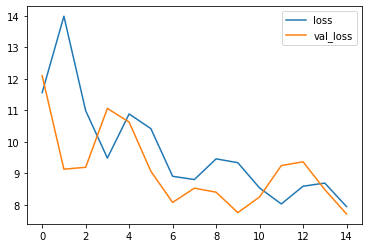

In [12]:
# we can analyze our training vs validation loss to see if our model is overfitting the data

# to do this, we will create a dataframe of all of our losses
# .history store the training loss and validation in each epoch
loss_df = pd.DataFrame(losses.history)

# plot this loss to visualize our model training
loss_df.loc[:, ['loss', 'val_loss']].plot()

### Further Exploration
* Just like all of the other libraries we use, there is a lot more that you can do that what I have shown so feel free to play around with it and discover new things
* There is another short demo file on tensorflow in the Supplemental Materials section of Google Classroom that you can check out if you want to learn more about this library